Ecommerce DataSet

In [85]:
import pandas as pd

In [86]:
df = pd.read_csv('DataSets/data.csv', encoding='latin1')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [87]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [88]:
df.drop(columns='CustomerID', inplace=True)

In [89]:
df.columns = df.columns.str.capitalize()

In [90]:
df["Invoiceno"].str.extract('(\d+)').astype(int)

,0
0,536365
1,536365
2,536365
3,536365
4,536365
...,...
541904,581587
541905,581587
541906,581587
541907,581587


In [91]:
df['Stockcode'].isna().sum()
df.dropna(inplace=True)

In [92]:
df['Description'] = df['Description'].str.lower()


In [93]:
df['Quantity'].notnull().sum()

np.int64(540455)

In [94]:
df.rename(columns={'Invoicedate':'Invoice_date'}, inplace=True)

In [95]:
df['Invoice_date'] = df['Invoice_date'].str.replace('/','-')
df['Invoice_date'] = pd.to_datetime(df['Invoice_date'])

In [96]:
df

,Invoiceno,Stockcode,Description,Quantity,Invoice_date,Unitprice,Country
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,United Kingdom
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,France
541905,581587,22899,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,France
541906,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,France
541907,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,France


In [97]:
df['Unitprice']

0         2.55
1         3.39
2         2.75
3         3.39
4         3.39
          ... 
541904    0.85
541905    2.10
541906    4.15
541907    4.15
541908    4.95
Name: Unitprice, Length: 540455, dtype: float64

In [98]:
df['Country']

0         United Kingdom
1         United Kingdom
2         United Kingdom
3         United Kingdom
4         United Kingdom
               ...      
541904            France
541905            France
541906            France
541907            France
541908            France
Name: Country, Length: 540455, dtype: object

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540455 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Invoiceno     540455 non-null  object        
 1   Stockcode     540455 non-null  object        
 2   Description   540455 non-null  object        
 3   Quantity      540455 non-null  int64         
 4   Invoice_date  540455 non-null  datetime64[ns]
 5   Unitprice     540455 non-null  float64       
 6   Country       540455 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 33.0+ MB


Transform and EDA

In [100]:
df.columns

Index(['Invoiceno', 'Stockcode', 'Description', 'Quantity', 'Invoice_date',
       'Unitprice', 'Country'],
      dtype='object')

In [101]:
df['total_price'] = df['Quantity'] * df['Unitprice']

In [102]:
df['date'] = df['Invoice_date'].dt.date

In [103]:
df['month'] = df['Invoice_date'].dt.month

In [104]:
df['dayofweek'] = df['Invoice_date'].dt.day_of_week

In [105]:
df['Hour'] = df['Invoice_date'].dt.hour

In [106]:
df['month_name'] = df['Invoice_date'].dt.month_name()

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 540455 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Invoiceno     540455 non-null  object        
 1   Stockcode     540455 non-null  object        
 2   Description   540455 non-null  object        
 3   Quantity      540455 non-null  int64         
 4   Invoice_date  540455 non-null  datetime64[ns]
 5   Unitprice     540455 non-null  float64       
 6   Country       540455 non-null  object        
 7   total_price   540455 non-null  float64       
 8   date          540455 non-null  object        
 9   month         540455 non-null  int32         
 10  dayofweek     540455 non-null  int32         
 11  Hour          540455 non-null  int32         
 12  month_name    540455 non-null  object        
dtypes: datetime64[ns](1), float64(2), int32(3), int64(1), object(6)
memory usage: 51.5+ MB


<Axes: xlabel='Country'>

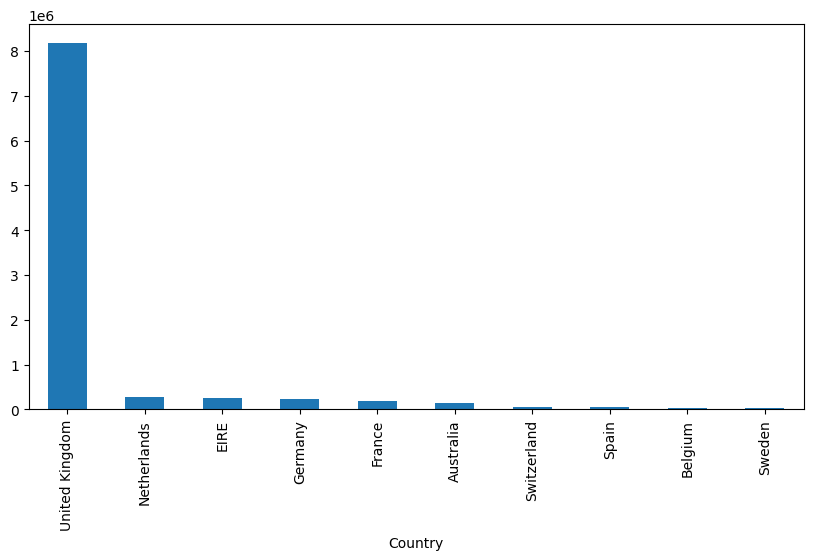

In [116]:
#Counntry wise total sale
df.groupby('Country')['total_price'].sum().sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10,5))

<Axes: title={'center': 'Sales by Hour'}, xlabel='Hour'>

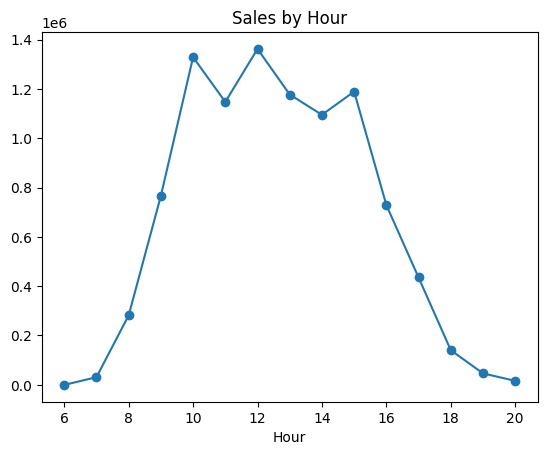

In [118]:
df.groupby('Hour')['total_price'].sum().plot(kind='line', marker='o', title='Sales by Hour')

<Axes: title={'center': 'Unique Orders per Day'}, xlabel='dayofweek'>

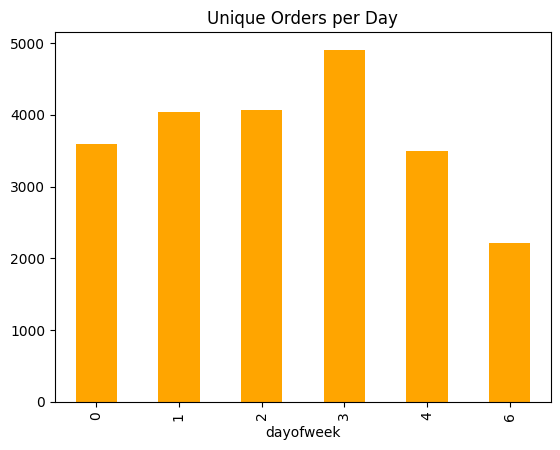

In [121]:
df.groupby('dayofweek')['Invoice_date'].nunique().plot(kind='bar',color='orange',title='Unique Orders per Day')

<Axes: title={'center': 'Price Distribution'}, ylabel='Frequency'>

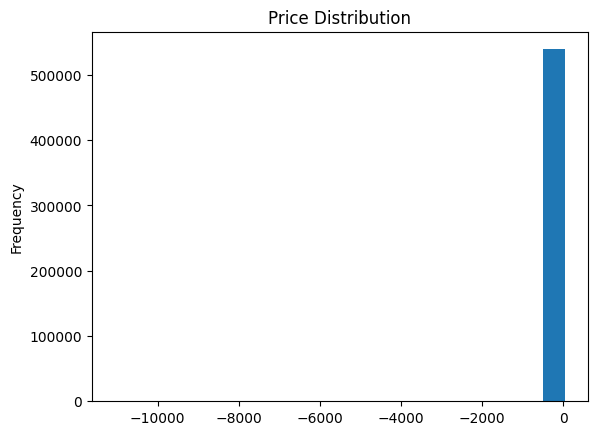

In [126]:
df[df['Unitprice'] < 50]['Unitprice'].plot(kind='hist', bins=20, title='Price Distribution')

In [128]:
print(df[['Quantity', 'Unitprice', 'total_price']].describe())

            Quantity      Unitprice    total_price
count  540455.000000  540455.000000  540455.000000
mean        9.603129       4.623519      18.036188
std       218.007598      96.889628     379.318894
min    -80995.000000  -11062.060000 -168469.600000
25%         1.000000       1.250000       3.480000
50%         3.000000       2.080000       9.840000
75%        10.000000       4.130000      17.400000
max     80995.000000   38970.000000  168469.600000
